# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [66]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [67]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

In [68]:
estimators = [('k_means_10', KMeans(n_clusters=10)),
              ('k_means_5', KMeans(n_clusters=5)),
              ('k_means_bad_init', KMeans(n_clusters=7, n_init=100,
                                               init='random'))]

In [69]:
print(X[:,0].shape,X[:,1].shape,y.shape)

(150,) (150,) (150,)


[1 7 7 7 1 8 7 1 7 7 1 1 7 7 8 8 8 1 8 1 1 1 7 1 1 7 1 1 1 7 7 1 8 8 7 7 1
 1 7 1 1 7 7 1 1 7 1 7 1 1 5 5 5 2 5 2 5 9 5 2 9 2 2 5 2 5 2 2 5 2 4 2 4 5
 5 5 5 6 5 9 2 9 2 4 2 5 5 5 2 2 2 5 2 9 2 2 2 5 9 2 0 4 0 6 0 3 2 3 0 3 6
 6 0 4 4 6 6 3 3 4 0 4 3 4 0 3 4 4 0 0 3 3 0 4 4 3 0 6 4 0 0 6 4 0 0 6 4 6
 6 4]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 0 3 3 3 0 3 0 0 3 0 3 0 3 3 0 3 0 3 0 3 3
 3 3 3 3 3 0 0 0 0 3 0 3 3 3 0 0 0 3 0 0 0 0 0 3 0 0 4 3 2 4 4 2 0 2 4 2 4
 4 4 3 4 4 4 2 2 3 4 3 2 3 4 2 3 3 4 2 2 2 4 3 3 2 4 4 3 4 4 4 3 4 4 4 3 4
 4 3]
[5 4 4 4 5 5 4 5 4 4 5 4 4 4 5 5 5 5 5 5 5 5 4 5 4 4 5 5 5 4 4 5 5 5 4 4 5
 5 4 5 5 4 4 5 5 4 5 4 5 4 6 6 6 2 6 2 6 2 6 2 2 2 2 6 2 6 2 2 1 2 1 2 1 6
 6 6 6 6 6 2 2 2 2 1 2 6 6 6 2 2 2 6 2 2 2 2 2 6 2 2 0 1 3 0 0 3 2 3 0 3 0
 1 0 1 1 0 0 3 3 1 0 1 3 1 0 3 1 1 0 3 3 3 0 1 1 3 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]


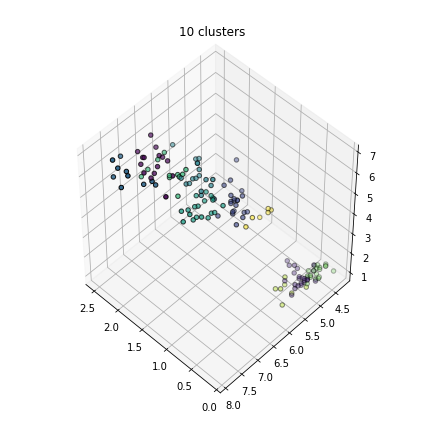

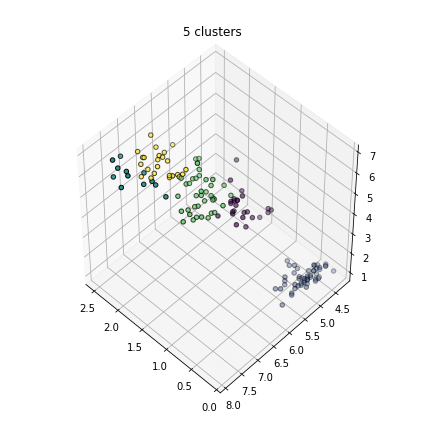

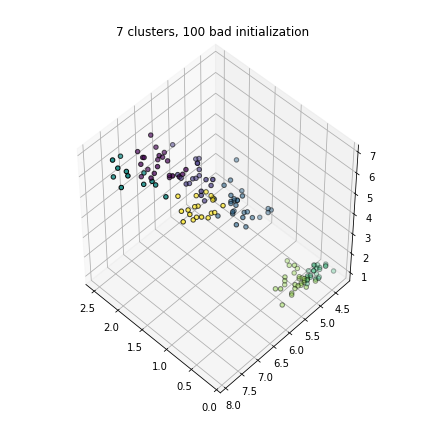

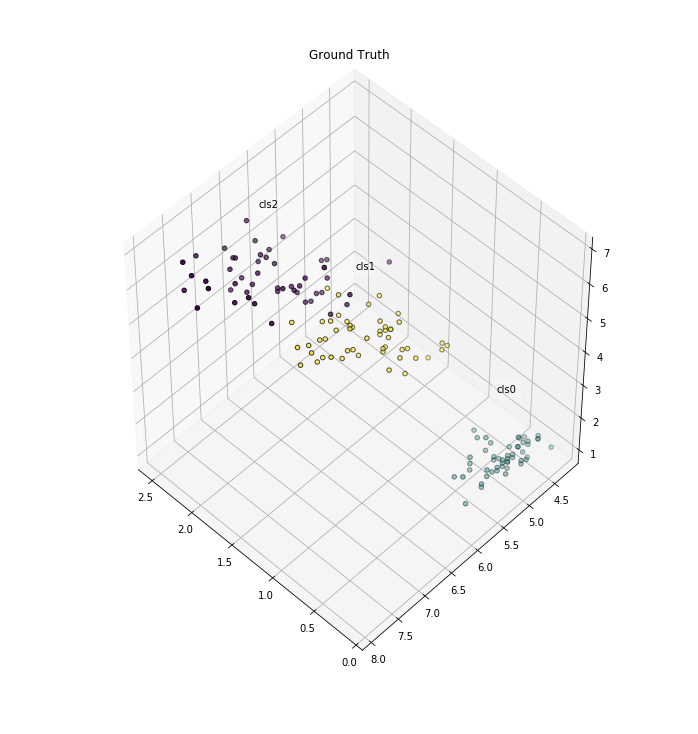

In [70]:
fignum = 1
titles = ['10 clusters', '5 clusters', '7 clusters, 100 bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(6, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_
    print(labels)
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

#     ax.w_xaxis.set_ticklabels([])
#     ax.w_yaxis.set_ticklabels([])
#     ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12 #設定與物體之間的距離
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float) #np.choose : 將原本 label 順序的(0 1 2)改成(1 2 0)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

# fig.show()